## Suite de notre analyse sur la prédiction de revenus au Box Office du dataframe 'test'

In [1]:
# Importation des librairies nécessaires à la prédiction de revenus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
# Importation des modèles de prédictions avec d'autre librairies pour nous aider à la sélection du modèle/variables
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split, learning_curve, cross_val_score

# Imporation de plusieurs modèle de régression de sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Importation des librairies qui vont m'aider à sélectionner les meilleurs variables pour notre modèle
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression

# Importation des metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Imporation de plusieurs modèle de régression 'indépendant'
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importation des dataframes
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test.csv')

# Affichage de toutes les colonnes dans notre dataframe
pd.set_option("display.max_columns", 100)

# Stockage des valeurs non logarithmé de mes variables 'budget', 'popularity' & 'revenue' pour réaliser des dashboards sur tableau
var_tab = train[['id', 'budget', 'popularity', 'revenue']].copy()

Nos dataframes ont des valeurs assez 'étrange', en effet, nous pouvons constater certaines valeurs quantitatives pour les variables ['revenue', 'budget', et 'runtime'] qui ne correspondent pas à la réalité des films(des budgets inférieur, la durée du film plus élevée, etc..) après vérification nous allons ajouter manuellement les valeurs réels des films.

#### Transformation de nos valeurs pour les remplacer par de meilleur valeur

In [4]:
### Train ###

# Budget & Revenue
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture

# Runtime
train.runtime[train.id == 391] = 86 #Il peor natagle de la meva vida
train.runtime[train.id == 592] = 90 #А поутру они проснулись
train.runtime[train.id == 925] = 95 #¿Quién mató a Bambi?
train.runtime[train.id == 978] = 93 #La peggior settimana della mia vita
train.runtime[train.id == 1256] = 92 #Cipolla Colt
train.runtime[train.id == 1542] = 93 #Все и сразу
train.runtime[train.id == 1875] = 86 #Vermist
train.runtime[train.id == 2151] = 108 #Mechenosets
train.runtime[train.id == 2499] = 108 #Na Igre 2. Novyy Uroven
train.runtime[train.id == 2646] = 98 #同桌的妳
train.runtime[train.id == 2786] = 111 #Revelation
train.runtime[train.id == 2866] = 96 #Tutto tutto niente niente

### Test ###

# Budget & Revenue
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

# Runtime
test.runtime[test.id == 4074] = 103 #Shikshanachya Aaicha Gho
test.runtime[test.id == 4222] = 93 #Street Knight
test.runtime[test.id == 4431] = 100 #Плюс один
test.runtime[test.id == 5520] = 86 #Glukhar v kino
test.runtime[test.id == 5845] = 83 #Frau Müller muss weg!
test.runtime[test.id == 5849] = 140 #Shabd
test.runtime[test.id == 6210] = 104 #Le dernier souffle
test.runtime[test.id == 6804] = 145 #Chaahat Ek Nasha..
test.runtime[test.id == 7321] = 87 #El truco del manco

#### Valeurs manquantes, Création de nouvelles variables, conversion de variables

In [5]:
def proc_json(string, key):
    try:
        data = eval(string)
        return ",".join([d[key] for d in data])
    except:
        return ''

def proc_json_len(string):
    try:
        data = eval(string)
        return len(data)
    except:
        return 0

    
def feature_engineering(df):
    # valeur manquante
    df.runtime.fillna(0, inplace=True)
    df.status.fillna('Released', inplace=True)
    df.release_date.fillna(df.release_date.mode()[0], inplace=True)
    
    # creation de valeur qui va compter les valeurs contenu dans notre variable
    df['count_genre'] = df.genres.apply(proc_json_len)
    df['count_country'] = df.production_countries.apply(proc_json_len)
    df['count_company'] = df.production_companies.apply(proc_json_len)
    df['count_splang'] = df.spoken_languages.apply(proc_json_len)
    df['count_cast'] = df.cast.apply(proc_json_len)
    df['count_crew'] = df.crew.apply(proc_json_len)
    df['count_staff'] = df.count_cast + df.count_crew
    df['count_keyword'] = df.Keywords.apply(proc_json_len)
    
    # conversion des variables JSON
    df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: proc_json(x, 'name'))
    df.genres = df.genres.apply(lambda x: proc_json(x, 'name'))
    df.production_companies = df.production_companies.apply(lambda x: proc_json(x, 'name'))
    df.production_countries = df.production_countries.apply(lambda x: proc_json(x, 'iso_3166_1'))
    df.spoken_languages = df.spoken_languages.apply(lambda x: proc_json(x, 'iso_639_1'))
    df.Keywords = df.Keywords.apply(lambda x: proc_json(x, 'name'))
    df.cast = df.cast.apply(lambda x: proc_json(x, 'name'))

    # création d'une variable qui va compter les mots dans les variables renseigné
    df['len_title'] = df.title.str.len()
    df.len_title.fillna(0, inplace=True)
    df['len_overview'] = df.overview.str.len()
    df.len_overview.fillna(0, inplace=True)
    df['len_tagline'] = df.tagline.str.len()
    df.len_tagline.fillna(0, inplace=True)
    
    # create category code features
    df['code_origlang'] = df.original_language.astype('category').cat.codes
    
    # creation de variables temporelle
    df.release_date = pd.to_datetime(df.release_date)
    df['release_year'] = df.release_date.dt.year
    df['release_year'] = df.release_year.apply(lambda x: x-100 if x > 2020 else x)
    df['release_month'] = df.release_date.dt.month
    df['release_wday'] = df.release_date.dt.dayofweek

    # création de variables booléen
    df['in_collection'] = (df.belongs_to_collection != '').astype('uint8')
    df['us_country'] = df.production_countries.str.contains('US').astype('uint8')
    df['en_lang'] = (df.original_language == 'en').astype('uint8')
    df['has_hompage'] = df.homepage.apply(lambda x: 1 if pd.isnull(x) == False else 0)

    # conversion de nos variables à echelle logarithmique
    if 'revenue' in df.columns:
        df.revenue = np.log1p(df.revenue)
    df.budget = np.log1p(df.budget)
    df.popularity = np.log1p(df.popularity)
    
    return df

In [6]:
# Utilisation de nos fonctions programmer précédement sur nos dataframes
train = feature_engineering(train)
test = feature_engineering(test)

In [7]:
train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,revenue_log,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,len_title,len_overview,len_tagline,code_origlang,release_year,release_month,release_wday,in_collection,us_country,en_lang,has_hompage
0,1,Hot Tub Time Machine Collection,16.454568,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",2.024905,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Paramount Pictures,United Artists,Metro-Goldwy...",US,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300,16.326300,1,1,3,1,24,72,96,4,22,155.0,52.0,7,2015,2,4,1,1,1,0
1,2,The Princess Diaries Collection,17.504390,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,2.224504,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,US,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959,18.370959,4,1,1,1,20,9,29,4,40,393.0,60.0,7,2004,8,4,1,1,1,0
2,3,,15.009433,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",4.178992,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Bold Films,Blumhouse Productions,Right of Way ...",US,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512,16.387512,1,1,3,1,51,64,115,12,8,130.0,47.0,7,2014,10,4,0,1,1,1
3,4,,13.997833,"Thriller,Drama",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,1.429099,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,,IN,2012-03-09,122.0,"en,hi",Released,NaN,Kahaani,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16.588099,16.588099,2,1,0,2,7,3,10,7,7,581.0,0.0,13,2012,3,4,0,0,0,1
4,5,,0.000000,"Action,Thriller",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,0.764570,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,,KR,2009-02-05,118.0,ko,Released,NaN,Marine Boy,,"Kim Kang-woo,Jo Jae-hyeon,Park Si-yeon,Kim Joo...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",15.182615,15.182614,2,1,0,1,4,2,6,0,10,168.0,0.0,18,2009,2,3,0,0,0,0


## A présent que nous avons terminé notre exploration dans l'analyse de données nous allons dorénavant nous concentrer sur la réalisation d'un modèle de prédiction pour pouvoir prédire le revenue au Box Office des films du dataframe 'test' à partir des informations du dataframe 'train'.
#### Pour cela nous allons determiner quel est le modèle plus performant parmis plusieurs modèles, selectionné les variables les plus importants pour notre modèle, et l'optimisation du modèle en ajoutant plusieurs paramètres mais aussi crée plusieurs groupes de variables selon plusieurs technique de sélection(toutes les variables, ceux qui ont un meilleur Accuracy, ceux qui sont les plus corrélé à la variable 'target', etc...)

#### Tout d'abord nous allons utiliser tous les modèles que je connais avec toutes les variables quantitatives pour constater celui qui aura un meilleur score.

In [8]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,revenue_log,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,len_title,len_overview,len_tagline,code_origlang,release_year,release_month,release_wday,in_collection,us_country,en_lang,has_hompage
0,1,Hot Tub Time Machine Collection,16.454568,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",2.024905,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Paramount Pictures,United Artists,Metro-Goldwy...",US,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300,16.326300,1,1,3,1,24,72,96,4,22,155.0,52.0,7,2015,2,4,1,1,1,0
1,2,The Princess Diaries Collection,17.504390,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,2.224504,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,US,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959,18.370959,4,1,1,1,20,9,29,4,40,393.0,60.0,7,2004,8,4,1,1,1,0
2,3,,15.009433,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",4.178992,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Bold Films,Blumhouse Productions,Right of Way ...",US,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512,16.387512,1,1,3,1,51,64,115,12,8,130.0,47.0,7,2014,10,4,0,1,1,1
3,4,,13.997833,"Thriller,Drama",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,1.429099,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,,IN,2012-03-09,122.0,"en,hi",Released,NaN,Kahaani,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16.588099,16.588099,2,1,0,2,7,3,10,7,7,581.0,0.0,13,2012,3,4,0,0,0,1
4,5,,0.000000,"Action,Thriller",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,0.764570,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,,KR,2009-02-05,118.0,ko,Released,NaN,Marine Boy,,"Kim Kang-woo,Jo Jae-hyeon,Park Si-yeon,Kim Joo...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",15.182615,15.182614,2,1,0,1,4,2,6,0,10,168.0,0.0,18,2009,2,3,0,0,0,0


In [9]:
# Sélection des variables quantitatives qui nous sérvirons de paramètre à notre modèles
all_features = train.select_dtypes(include=['int64', 'float64', 'uint8', 'int8']).columns.tolist()

# Mise à l'écart dela variable 'id' qui n'est d'aucune utilité et de 'revenue_log' qui est la variable à trouvé
all_features.remove('id')
all_features.remove('revenue_log')

# Stockage dans une variable de la corrélation entre nos variables qui sera utile plus tard dans l'analyse
train_corr = train[all_features].corr()

# Sélection de la variable à trouver grâce aux variables quantitatives explicatives de 'all_features'
target = 'revenue'

# Suppréssion de la variable à expliquer de notre liste de variable contenu dans 'all_features'
all_features.remove(target)

#### Sélection de plusieurs modèle de régression + Test des différents modèles pour choisir le plus performant

In [10]:
# Réalisation d'une fonction qui va répertorier les différents models de prédiction
def select_model(X, Y):

    # Variable qui va stocker les modèles qui seront passer dans notre boucle 'for'
    best_models = {}
    
    # Stockage de tous nos potentiels modèles 
    models = [
        {   'name': 'LinearRegression',
            'estimator': LinearRegression() 
        },
        {   'name': 'KNeighborsRegressor',
            'estimator': KNeighborsRegressor(),
        },
        {   'name': 'RandomForestRegressor',
            'estimator': RandomForestRegressor(),
        },
        {   'name': 'MLPRegressor',
            'estimator': MLPRegressor(),
        },
        {   'name': 'GradientBoostingRegressor',
            'estimator': GradientBoostingRegressor(),
        },
        {   'name': 'XGBoost',
            'estimator': XGBRegressor(),
        },
        {   'name': 'LightGBM',
            'estimator': LGBMRegressor(),
        },
        
    ]
    
    # Création d'une boucle 'for' pour tester tous nos modèles et afficher toutes les caractèristiques de nos modèles ainsi que leurs score
    for model in tqdm(models): # tqdm => ajoute une 'progress_bar' pour savoir ou nous en somme dans notre boucle 'for' par modèles(la barre rose)
        # Sélection des meilleurs paramètres grace à GridSearchCV
        # param_grid => il nous permet d'insérer dans un dictionnaire {} des paramètres, dans notre cas nous n'allons pas en rajouter
        # cv => cross-validation, qui va découper nos données en 5 partis pour retourner le score des erreurs au carré à 5 reprise et en faire une moyenne
        # scoring => avec quel stratégie nous allons calculer les données compris dans notre 'cross_validation'
        grid = GridSearchCV(model['estimator'], param_grid={}, cv=5, scoring = 'neg_mean_squared_error', verbose=False, n_jobs=-1)
        # mise en place de notre modèle par rapport aux données insérer dans notre fonction 'select_model'
        grid.fit(X, Y)
        # paramètrage de l'affichage du résultat de nos tests par modèle
        best_models[model['name']] = {'score': grid.best_score_, 'params': grid.best_params_, 'model': model['estimator']}
        
    return best_models

# Instanciation de notre fonction avec les données insérer
models = select_model(train[all_features], train[target])
models

100%|██████████| 7/7 [00:19<00:00,  2.73s/it]


{'LinearRegression': {'score': -5.138759325633446,
  'params': {},
  'model': LinearRegression()},
 'KNeighborsRegressor': {'score': -7.497129328445498,
  'params': {},
  'model': KNeighborsRegressor()},
 'RandomForestRegressor': {'score': -4.554824282553726,
  'params': {},
  'model': RandomForestRegressor()},
 'MLPRegressor': {'score': -5.971076476696106,
  'params': {},
  'model': MLPRegressor()},
 'GradientBoostingRegressor': {'score': -4.373929829737736,
  'params': {},
  'model': GradientBoostingRegressor()},
 'XGBoost': {'score': -4.993355410034269,
  'params': {},
  'model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None

In [11]:
# Recherche du meilleur score R² de nos modèles
max_score = -100
best_model_name = ''

for m in models:
    if models[m]['score'] > max_score: # Si le score de notre modèle est meilleur que le 'max_score'
        max_score = models[m]['score'] # alors le 'max_score' est changer par le score du modèle
        best_model_name = m            # le nom du modèle est stocké dans la variable 'best_model_name'
        
print(best_model_name, max_score)

GradientBoostingRegressor -4.373929829737736


In [12]:
# Stockage de notre modèle
model_initial = GradientBoostingRegressor()

In [13]:
# Sélection de nos variables
X = train[all_features]
y = train[target]

#### Le GradientBoostingRegressor  étant le modèle le plus performant nous allons l'utilisé pour réaliser notre prédiction. Maintenant nous allons paramètrer notre modèle.

#### Optimisation de notre modèle

In [14]:
# Nous allons séparer notre dataset pour entrainer notre modèle avec 80% des données et utilisé les 20 autre % pour les test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [15]:
# Nous allons paramétrer notre modèle
# Les valeurs ci-dessous ont été testé avec GridSearchCV et sont les plus optimaux
params = {
    "n_estimators": [500],
    "max_depth": [5],
    "min_samples_split": [8],
    "learning_rate": [0.01]
}

In [16]:
# Testons plusieurs paremètres pour avoir la meilleur configuration possible
# Stocke notre modèle de test pour nos différents paramètre
grid = GridSearchCV(model_initial, param_grid = params, cv=5, verbose=False, n_jobs=-1)

# nous entrainons nos données via les différents paramètre injecter dans notre dictionnaire 'params'
grid.fit(X_train, y_train)

# Affichage des meilleurs paramètre injecter
print(grid.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 500}


#### Avons-nous besoin de plus de data pour améliorer notre modèle ? Nous allons répondre à cette question grâce aux courbes d'apprentissage qui vont nous montrer si la performance de notre modèle à atteint ou non son plafond. Elle va nous permettre de visualiser si les données injeter dans notre modèle qu'elle divisera en 'lot' est de plus en plus performant.

[ 192  384  576  768  960 1152 1344 1536 1728 1920]


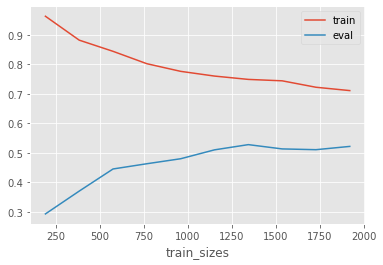

In [17]:
# parémetrons la courbe d'apprentissage pour injecter dans notre modèle uniquement 10% de nos données et en ajouter petit à petit
# 10% juqu'à atteindre les 100% (np.linspace qui nous permet de réaliser cette manoeuvre)
N, train_score, val_score = learning_curve(model_initial, X_train, y_train,
                                           train_sizes = np.linspace(0.1, 1, 10), cv = 5)

# la variable 'N' est le nombre d'individus injecter dans notre courbe d'apprentissage 
print(N)

# Création du graphique pour visualiser l'évolution de nos courbes
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'eval')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

On peut constater sur ce graphique que notre modèle n'est pas en 'over-fitting' c-à-d qu'il peut généraliser nos données et que la courbe 'eval' se rapproche de notre courbe 'train' ce qui est une bonne nouvelle, le but est qu'il soit le plus proche possible, nous pouvons l'améliorer en ajoutant de la données mais le résultat est assez satisfaisant pour éviter de le faire.

#### Prédiction & Évaluation de notre modèle de prédiction

In [18]:
# Injections des paramètres optimaux pour notre modèle
opt_model = GradientBoostingRegressor(learning_rate = 0.01,
                                      max_depth = 5,
                                      min_samples_split = 8, 
                                      n_estimators = 500)

# Entrainement de notre modèle avec notre dataset 'train'
opt_model.fit(X_train, y_train)

y = test[all_features]

# Prédiction du revenue du dataset 'test'
y_pred = opt_model.predict(y)

# Affichage du score obtenue de notre prédiction
print(round(opt_model.score(X_train, y_train), 2))

# Création d'un nouveau dataframe avec les 'id' du dataframe 'test' + la prédiction pour chaque individus
submit = pd.DataFrame({'id': test.id, 'revenue': np.expm1(y_pred)}) # expm1 => renvoie l'exponentiel - 1 de chaque valeur
display(submit)

# Sauvegarde de notre dataframe
submit.to_csv('submission.csv', index=False)

0.78


,id,revenue
0,3001,7.004242e+05
1,3002,1.723427e+06
2,3003,4.629113e+06
3,3004,8.143633e+06
4,3005,1.478139e+06
...,...,...
4393,7394,4.988267e+07
4394,7395,4.796792e+07
4395,7396,4.026571e+07
4396,7397,3.841705e+06


#### Comparatif des revenus prédit et de ceux existant

In [19]:
# Sélection de 10 films pour comparer les revenus
belong = test[['id', 'title']]

# Jointure des films et des revenus prédites par notre modèle
comparaison = pd.merge(belong, submit, how = 'left', on = 'id')
comparaison_gros_revenue = comparaison[comparaison.revenue > 500000000][:10]
comparaison_gros_revenue

,id,title,revenue
44,3045,Captain America: The First Avenger,5.168881e+08
96,3097,Spider-Man 3,7.703204e+08
209,3210,Iron Man,5.517157e+08
388,3389,The Amazing Spider-Man 2,8.405654e+08
429,3430,Kong: Skull Island,5.103040e+08
458,3459,Pacific Rim,6.042898e+08
516,3517,Thor: The Dark World,6.014146e+08
627,3628,Rise of the Planet of the Apes,5.154233e+08
942,3943,Rogue One: A Star Wars Story,6.965992e+08
953,3954,Shrek 2,5.041313e+08


In [20]:
# Info  : les chiffres obtenus étant en Euros je les ai convertis en dollars mais en dollar de 2022 donc il se peut qu'il y ai des incertitudes
# Création d'une nouvelle variable pour y stocké nos valeurs
comparaison_gros_revenue['revenu_réel'] = 0

# Insértion de nos noouvelles valeurs dans notre dataframe de comparaison
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3045,'revenu_réel'] = 370600000   # Captain America: The First Avenger    
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3097,'revenu_réel'] = 895000000   # Spider-Man 3          
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3210,'revenu_réel'] = 586000000   # Iron Man  
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3389,'revenu_réel'] = 708900000   # The Amazing Spider-Man 2 
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3430,'revenu_réel'] = 567000000   # Kong: Skull Island  
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3459,'revenu_réel'] = 411000000   # Pacific Rim
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3517,'revenu_réel'] = 645000000   # Thor: The Dark World  
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3628,'revenu_réel'] = 482000000   # Rise of the Planet of the Apes    
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3943,'revenu_réel'] = 1056000000  # Rogue One: A Star Wars Story       
comparaison_gros_revenue.loc[comparaison_gros_revenue['id'] == 3954,'revenu_réel'] = 929000000   # Shrek 2

comparaison_gros_revenue

,id,title,revenue,revenu_réel
44,3045,Captain America: The First Avenger,5.168881e+08,370600000
96,3097,Spider-Man 3,7.703204e+08,895000000
209,3210,Iron Man,5.517157e+08,586000000
388,3389,The Amazing Spider-Man 2,8.405654e+08,708900000
429,3430,Kong: Skull Island,5.103040e+08,567000000
458,3459,Pacific Rim,6.042898e+08,411000000
516,3517,Thor: The Dark World,6.014146e+08,645000000
627,3628,Rise of the Planet of the Apes,5.154233e+08,482000000
942,3943,Rogue One: A Star Wars Story,6.965992e+08,1056000000
953,3954,Shrek 2,5.041313e+08,929000000


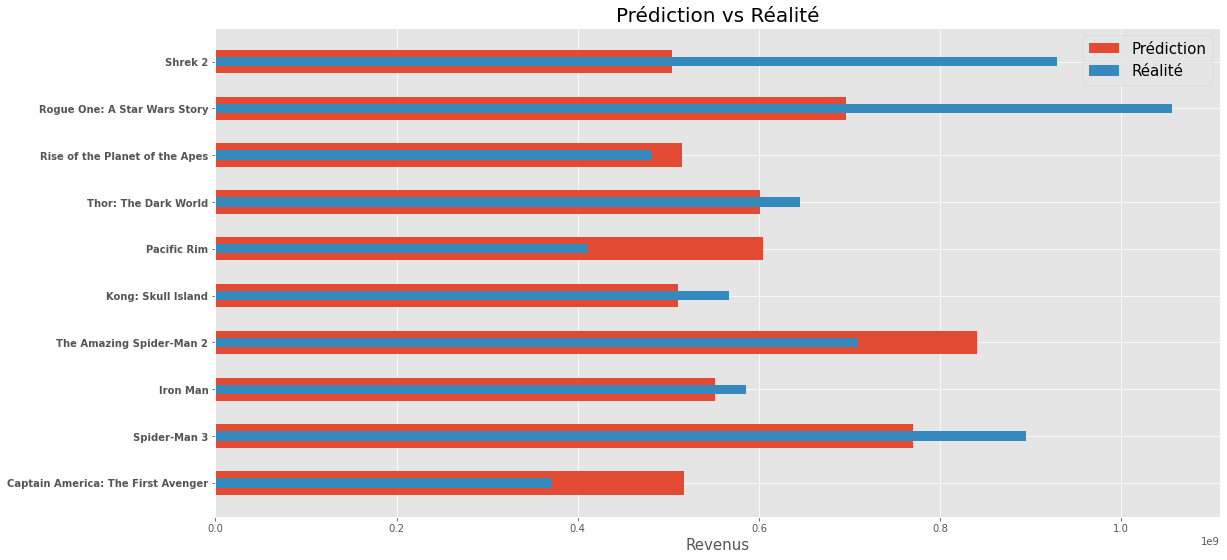

In [21]:
# Création d'un graphique pour mieux comprendre les écarts entre la réalité et notre prédiction
fig, ax = plt.subplots(figsize=(18,9))

#Récupération du nom des films
xlabels = comparaison_gros_revenue['title']

# 
ax1 = ax.barh(xlabels, comparaison_gros_revenue['revenue'], height = 0.5, label = 'Prédiction')
ax2 = ax.barh(xlabels, comparaison_gros_revenue['revenu_réel'], height = 0.20, label = 'Réalité')

ax.set_xlabel('Revenus', fontsize = 15)
ax.set_yticklabels(xlabels, fontsize = 10, fontweight = 'bold')
ax.set_title('Prédiction vs Réalité', fontsize = 20)
ax.legend(fontsize = 15)

plt.savefig('Graphs/Prédiction vs Réalité')
plt.show()

#### Qu'elles sont les variables qui contribue le plus à la prédiction de nos revenues ?

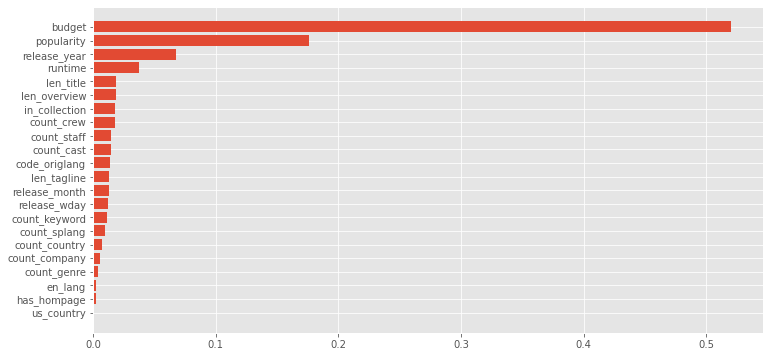

In [22]:
# Stockage des score R² de nos variables par rapport à notre variable 'revenue'
feature_importance = opt_model.feature_importances_

# 
sorted_idx = np.argsort(feature_importance)

# la taille de l'axe x sera 
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train[all_features].columns)[sorted_idx])

plt.savefig('Graphs/Les variables les plus influent de notre modèle.png')
plt.show()

On peut constater qu'il y a 4 variables(1 - budget, 2 - popularity, 3 - release_year, 4 - runtime) qui ont une plus grande importance pour notre modèle de prédiction.

In [23]:
# Rajout des variables non logarithmé dans notre dataframe pour notre dashboards tableau
train = pd.merge(train, var_tab, on = 'id', how = 'left')

# Rename de nos colonne
train.rename(columns ={'budget_x' : 'budget_log', 'popularity_x' : 'popularity_log',
                       'budget_y' : 'budget', 'popularity_y' : 'popularity', 'revenue_y' : 'revenue'}, inplace = True)

train.drop('revenue_x', axis = 1, inplace = True)
train.head()

,id,belongs_to_collection,budget_log,genres,homepage,imdb_id,original_language,original_title,overview,popularity_log,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue_log,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,len_title,len_overview,len_tagline,code_origlang,release_year,release_month,release_wday,in_collection,us_country,en_lang,has_hompage,budget,popularity,revenue
0,1,Hot Tub Time Machine Collection,16.454568,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",2.024905,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Paramount Pictures,United Artists,Metro-Goldwy...",US,2015-02-20,93.0,en,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300,1,1,3,1,24,72,96,4,22,155.0,52.0,7,2015,2,4,1,1,1,0,14000000,6.575393,12314651
1,2,The Princess Diaries Collection,17.504390,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,2.224504,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,US,2004-08-06,113.0,en,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959,4,1,1,1,20,9,29,4,40,393.0,60.0,7,2004,8,4,1,1,1,0,40000000,8.248895,95149435
2,3,,15.009433,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",4.178992,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"Bold Films,Blumhouse Productions,Right of Way ...",US,2014-10-10,105.0,en,Released,The road to greatness can take you to the edge.,Whiplash,"jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512,1,1,3,1,51,64,115,12,8,130.0,47.0,7,2014,10,4,0,1,1,1,3300000,64.299990,13092000
3,4,,13.997833,"Thriller,Drama",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,1.429099,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,,IN,2012-03-09,122.0,"en,hi",Released,NaN,Kahaani,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16.588099,2,1,0,2,7,3,10,7,7,581.0,0.0,13,2012,3,4,0,0,0,1,1200000,3.174936,16000000
4,5,,0.000000,"Action,Thriller",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,0.764570,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,,KR,2009-02-05,118.0,ko,Released,NaN,Marine Boy,,"Kim Kang-woo,Jo Jae-hyeon,Park Si-yeon,Kim Joo...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",15.182614,2,1,0,1,4,2,6,0,10,168.0,0.0,18,2009,2,3,0,0,0,0,0,1.148070,3923970


In [24]:
# Sauvegarde de notre dataframe
train.to_csv('train_stat.csv', index = False)

### En conclusion, nous avons :
- ajouter de nouvelles data pour que ça remplisse ou corrige notre dataframe.
- nous avons convertie les variables de types 'json' et crée de nouvelle variable.
- Nous avons sélectionner les variables quantitatives de notre dataset 'train' pour les regrouper dans une nouvelle variable
- Isoler la variable 'revenue'
- Tester plusieur modèles de prédiciton pour choisir le meilleur parmis nos données(avec des paramètre de bases)
- Optimiser notre modèle en sélectionnant les meilleurs paramètres (R² passant de 0.52 à 0.78)
- Évaluer notre modèle grâce aux croubes d'apprentissage et le R² obtenus
- Prédire le revenue aux Box Office du dataset 'test' avec notre modèle de régression

Nous allons dorénavant passer aux test statistiques dans un autre notebook pour pouvoir prouver que notre prédiction est correct.